In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from NPw_aux import prepare_ion_data
import warnings
import os
warnings.filterwarnings("ignore")
import logging
datapath = os.environ.get("DATA_PATH")
if datapath == None:
    raise KeyError("Enviromental variable data path has to be declared")
print(datapath)
from datetime import datetime, timedelta
freq = timedelta(minutes=30)
logging.disable(logging.CRITICAL)

/home/carloscano/data/


In [2]:
#df_GNSSTEC,df_covariate, df_eq = prepare_ion_data(datapath, "GRK", freq)

In [3]:
#df_GNSSTEC.to_pickle("df_GNSSTEC.pkl")
#df_covariate.to_pickle("df_covariate.pkl")
#df_eq.to_pickle("df_eq.pkl")

In [4]:
import pandas as pd
df_GNSSTEC = pd.read_pickle("../data_test/df_GNSSTEC.pkl")
df_covariate = pd.read_pickle("../data_test/df_covariate.pkl")
df_eq = pd.read_pickle("../data_test/df_eq.pkl")
n_forecasts = 48


In [5]:
%matplotlib inline
from aux_function_SR import read_data, get_eq_filtered, SR_SENSORS
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_log_level, save, load
import logging
import pandas as pd

import pickle
from NPw import NPw, ConfigEQ, ConfigNPw, ConfigForecast
from dataclasses import dataclass, asdict
from dateutil.relativedelta import *

import ast

import sys
import dateutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import TCNModel, RNNModel
from darts.dataprocessing.transformers import Scaler,MissingValuesFiller
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape, r2_score
from darts.utils.missing_values import fill_missing_values
from darts.datasets import AirPassengersDataset, SunspotsDataset, EnergyDataset

from NPw import NPw

import pandas as pd

from darts.models import TCNModel
import darts.utils.timeseries_generation as tg
from darts.utils.likelihood_models import GaussianLikelihood
from darts.datasets import EnergyDataset
from darts.utils.missing_values import fill_missing_values
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from NPw_aux import prepare_EQ, ConfigEQ


In [6]:

ConfigEQ_d = {
    "dist_start": 1000,
    "dist_delta": 3000,
    "mag_start": 4.5,
    "mag_delta": 2,
    "filter": 1,
    "drop": ["arc_cos", "arc_sin"],
}
config_events = ConfigEQ(**ConfigEQ_d)

df_regressor = df_GNSSTEC.reset_index()
df_other = df_covariate
df_events = prepare_EQ(df_eq, config_events)    
 
forecast_length = timedelta(hours=24)
question_mark_length = timedelta(hours=24)
# Time to take into account to predict 
historic_lenght =  timedelta(days=5)
training_lenght = timedelta(days=30)

In [7]:
from darts import TimeSeries

In [36]:
from DartsFCeV import NLinearDartsFCeVConfig,TransformerDartsFCeVConfig, DartsFCeVConfig,NHITSDartsFCeVConfig, NBEATSDartsFCeVConfig,RNNDartsFCeVConfig,TCNDartsFCeVConfig, TFTDartsFCeVConfig

from FCeV import FCeV, FCeVConfig

TCN_darts_FCeV_config = {
"dilation_base": 2,
"weight_norm": True,
#"kernel_size": 16,
#"num_filter": 1000
}


RNN_darts_FCeV_config = {
     "RNNmodel": "RNN"
}
RNN_darts_FCeV_config = RNNDartsFCeVConfig(**RNN_darts_FCeV_config)

NBEATS_darts_FCeV_config = {
    "num_stacks": 10,
    #"num_layers": 10,
    "num_blocks": 10,
    #"layer_widths": 10,
    "expansion_coefficient_dim": 10
}


NHITS_darts_FCeV_config = {
    "num_stacks": 10,
    #"num_layers": 10,
    "num_blocks": 10,
    #"layer_widths": 10,
    "expansion_coefficient_dim": 10,
    "max_pool_1d": True
}

TFT_darts_FCeV_config = {
    #"lstm_layers" : 2,
    #"hidden_size" : 64,
    "num_attention_heads" : 4,
    "full_attention" : False,
    "add_relative_index": False,
    "hidden_continuous_size" : 8,
}
TFT_darts_FCeV_config = TFTDartsFCeVConfig(**TFT_darts_FCeV_config)


NLinear_darts_FCeV_config = {
"const_init": True,
}
TCN_darts_FCeV_config = TCNDartsFCeVConfig(**TCN_darts_FCeV_config)



NBEATS_darts_FCeV_config = NBEATSDartsFCeVConfig(**NBEATS_darts_FCeV_config)

NHITS_darts_FCeV_config = NHITSDartsFCeVConfig(**NHITS_darts_FCeV_config)


NLinear_darts_FCeV_config = NLinearDartsFCeVConfig(**NLinear_darts_FCeV_config)
 #assert self.head_dim * num_heads == self.embed_dim, 
Transformer_darts_FCeV_config = {
    #"d_model": 12,
    "n_head_divisor": 6,
    #"num_encoder_layers": 3,
    #"num_decoder_layers": 3,
    "dim_feedforward": 512
}
Transformer_darts_FCeV_config = TransformerDartsFCeVConfig(**Transformer_darts_FCeV_config)

darts_FCev_config = {
    "DartsModelConfig": RNN_darts_FCeV_config,
    "dropout":0.2,
    "n_epochs":300,
    "n_layers": 1,
    "internal_size": 20,
    "batch_size":2400 ,
    "learning_rate": 1e-3,
    "use_gpu": True,
    "event_type": "Non-Binary",
    "patience":30,
    "seed": 1234567,
    "probabilistic": True,
    "config_synthetic": "constant"
}
darts_FCeV_config = DartsFCeVConfig(**darts_FCev_config)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
train_day = datetime.fromisoformat("2018-10-01T00:00:00")
val_day = datetime.fromisoformat("2019-01-01T00:00:00")
forecast_length = timedelta(hours=24)
question_mark_length = timedelta(hours=24)
# Time to take into account to predict 
historic_lenght =  timedelta(days=2)
training_lenght = timedelta(days=38 * 3)
freq = pd.Timedelta(minutes=30)

FCev_config = {
    "freq": freq,
    "forecast_length": forecast_length,
    "question_mark_length": question_mark_length,
    "training_length": training_lenght,
    "verbose": True,
    "input_length": historic_lenght
}


FCev_config = FCeVConfig(**FCev_config)

In [38]:
df_covariate.columns

Index(['GRK', 'Kp', 'f107', 'N sunspot'], dtype='object')

In [39]:
#synthetic_events = pd.read_pickle("../data_test/synthetic.pkl")
#df_synth = prepare_EQ(synthetic_events, config_events)  
output_path = "results/"
synthetic_events = df_covariate[["f107"]].quantile([.1,0.25, .5,0.75, .9])#.drop(["count", "std"])
synthetic_events = pd.DataFrame(np.linspace(60, 80, 21), columns= ["f107"])
df_events = pd.DataFrame(df_covariate["f107"])

current_fcev = FCeV(FCev_config, darts_FCeV_config, df_GNSSTEC, df_covariate.drop("f107", axis = 1),df_events,  output_path, synthetic_events)

In [40]:
import pandas_bokeh
import pandas as pd
pandas_bokeh.output_notebook()
pd.plotting.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
pd.options.plotting.backend = "plotly" 
df_events.plot()

Loading BokehJS ...

Loading BokehJS ...

FigureWidgetResampler({
    'data': [{'hovertemplate': 'variable=f107<br>ds=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'f107',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> f107 <i style="color:#fc9944">~2D</i>',
              'showlegend': True,
              'type': 'scattergl',
              'uid': '59130688-fb1b-436a-af6f-1b85016c7787',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 23, 30), ...,
                          datetime.datetime(2020, 12, 29, 7, 0),
                          datetime.datetime(2020, 12, 31, 3, 0),
                          datetime.datetime(2021, 1, 1, 23, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([95.1, 96.6, 98.5, ..., 8

In [41]:
current_fcev.create_folds(pd.Timestamp(2019,3,16, 12, 0), 100)
print(current_fcev.folds.iloc[0])
from darts import TimeSeries

2016-01-01 00:00:00
start_date   2018-11-29
end_date     2019-03-23
Name: 0, dtype: datetime64[ns]


In [42]:

iteration = 0
from func_timeout import func_set_timeout, FunctionTimedOut
@func_set_timeout(3600)
def train_with_timeout(fcev_instance, iteration):
    df_fore = current_fcev.process_fold(iteration)
    return df_fore

In [43]:
try:
    df_fore = train_with_timeout(current_fcev, iteration)
except FunctionTimedOut: 
    print(np.nan)
    #sys.exit(0)
    #Missing covariates; could not find past covariates in index value range: 2019-11-02 14:30:00 - 2019-11-04 14:00:00.

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [44]:
df_main = df_fore["BASE"]
from FCeV import METRICS
current_ts = TimeSeries.from_dataframe(df_main["current"])
all_ts_base = current_fcev.FCeV_model.input_series.drop_after(current_ts.start_time())
all_ts_base = all_ts_base.append(current_ts)
all_ts_real, _ = current_fcev.FCeV_model.input_series.split_after(current_ts.end_time())

In [45]:
df_main.head()

current                                      pred  \
component                larm      dyng      duth       noa1       larm   
ds                                                                        
2019-03-22 00:00:00  6.298333  7.004167  7.112333  22.242071  20.966995   
2019-03-22 00:30:00  6.461000  7.082334  7.199500  22.262974  20.843418   
2019-03-22 01:00:00  6.520000  7.162001  7.223000  22.283878  20.814184   
2019-03-22 01:30:00  6.335166  7.118667  7.115833  22.304781  20.949560   
2019-03-22 02:00:00  6.232500  7.022666  7.147167  22.325686  20.616917   

                                                         uncer            \
component                 dyng       duth       noa1      larm      dyng   
ds                                                                         
2019-03-22 00:00:00  19.552410  20.632727  21.840332  2.780878  1.767701   
2019-03-22 00:30:00  19.440313  20.690407  21.771559  2.922087  1.869885   
2019-03-22 01:00:00  19.491360  20.707094  21.805292  2.838645  1.906635   
2019-03-22 01:30:00  19.422258  20.661867  21.742514  2.982267  1.948824   
2019-03-22 02:00:00  19.438536  20.589706  21.835808  2.894325  1.919996   

                                         
component                duth      noa1  
ds                                       
2019-03-22 00:00:00  1.790857  1.776366  
2019-03-22 00:30:00  1.772833  1.861960  
2019-03-22 01:00:00  1.900712  1.893543  
2019-03-22 01:30:00  1.923446  1.952799  
2019-03-22 02:00:00  1.995640  2.036497

42.867966


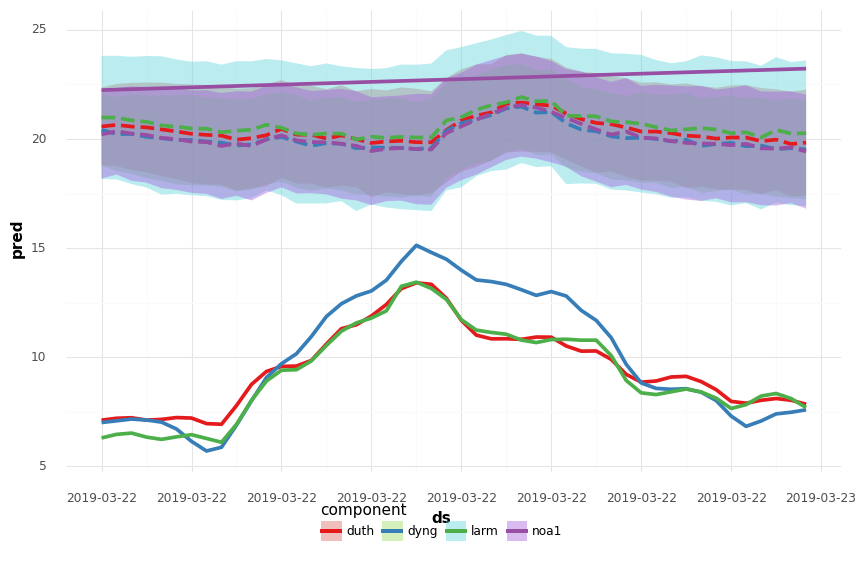

<ggplot: (8777449620221)>

In [46]:
from FCeV import METRICS
df_main = df_fore["EMPTY"]
print(current_fcev.get_metrics_from_fc(df_main["current"], df_main["pred"], METRICS.CoV).mean().mean())
plot = current_fcev.plot_results(df_main)
plot

40.737152


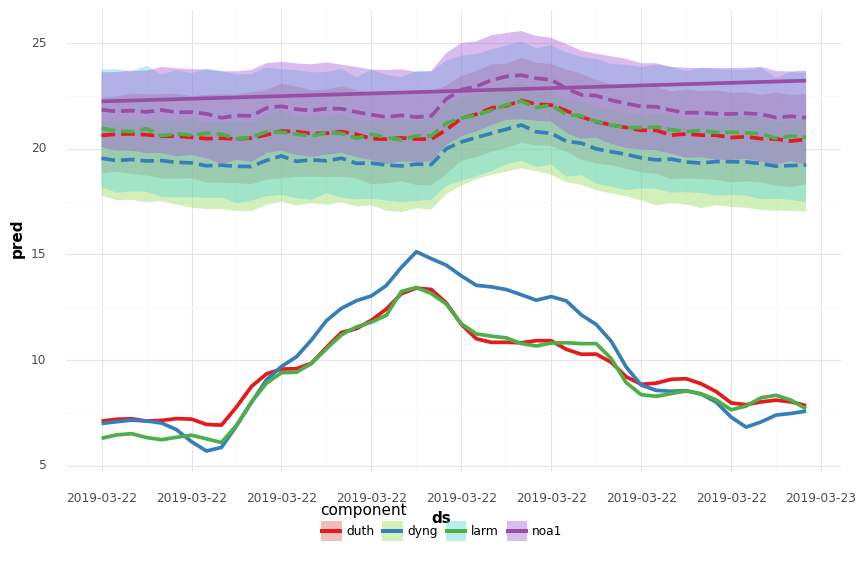

<ggplot: (8777449503585)>

In [47]:
df_main = df_fore["BASE"]
print(current_fcev.get_metrics_from_fc(df_main["current"], df_main["pred"], METRICS.CoV).mean().mean())
plot = current_fcev.plot_results(df_main)
plot

43.567825


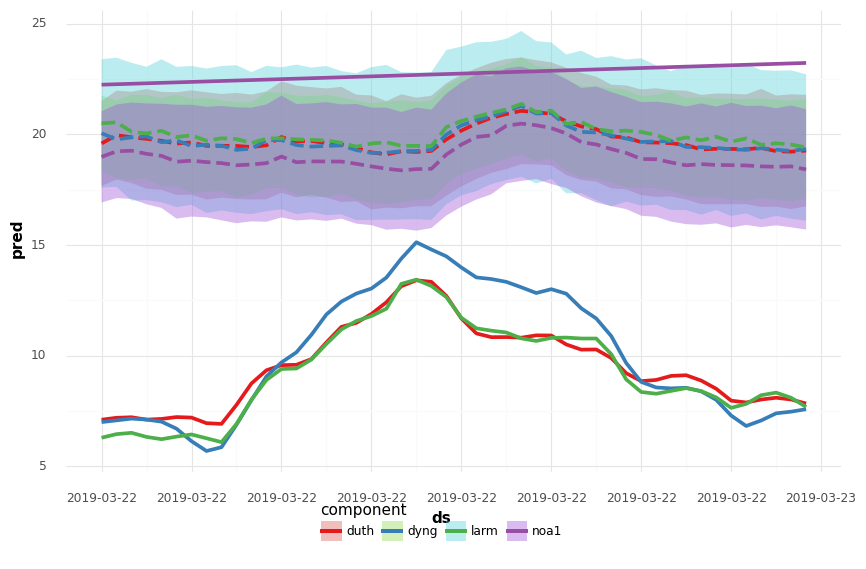

<ggplot: (8777449361104)>

In [50]:
df_main = df_fore["2"]["2"]
print(current_fcev.get_metrics_from_fc(df_main["current"], df_main["pred"], METRICS.CoV).mean().mean())
plot = current_fcev.plot_results(df_main)
plot

42.8903


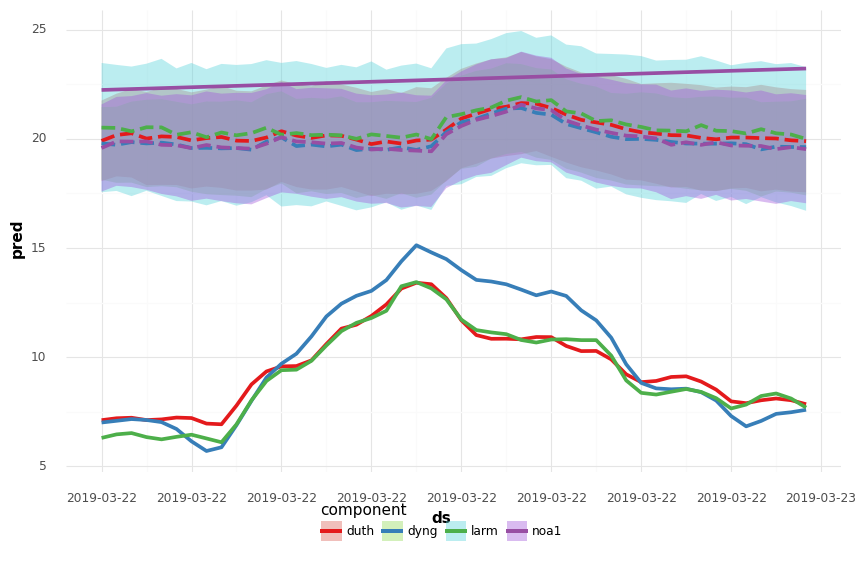

<ggplot: (8777418928204)>

In [51]:
df_main = df_fore["6"]["6"]
print(current_fcev.get_metrics_from_fc(df_main["current"], df_main["pred"], METRICS.CoV).mean().mean())
plot = current_fcev.plot_results(df_main)
plot

In [106]:
real = current_fcev.FCeV_model.input_series

In [107]:
iterations = current_fcev.iterations

In [ ]:
values = current_fcev.FCeV_model.model.predict(n=48, num_samples=1000).plot()


In [ ]:
day = iterations.iloc[iteration].end_date

In [ ]:
real.slice(day - pd.Timedelta(days = 4), day).plot()

## SALES EXAMPLE

In [ ]:
datapath_sales = "/home/carloscano/data/kaggle/store-sales-time-series-forecasting/"

In [ ]:
df_train =  pd.read_csv(datapath_sales + "train.csv", parse_dates=["date"]).rename(columns = {"date":"ds"})
df_test =  pd.read_csv(datapath_sales + "test.csv", parse_dates=["date"]).rename(columns = {"date":"ds"})


In [ ]:
df_test["ds"]

In [ ]:
df_train["family"].unique()

In [ ]:
df_train["store_nbr"].max()

#AUTOMOTIVE - 11

#Electronics index: 47 - 

import time
for i in range(1, 55):
    df_train_selected = df_train[(df_train["store_nbr"] == i) &(df_train["family"] == "BOOKS") ]
    df_train_selected = df_train_selected.reset_index().drop(["store_nbr", 'family', "id", "index"], axis = 1).set_index("date")
    total_prom = np.sum(df_train_selected["onpromotion"] > 0)
    total_value = np.sum(df_train_selected["onpromotion"])
    print(f"index: {i} - {total_value} / {total_prom}")

In [ ]:
df_train_selected = df_train[(df_train["store_nbr"] == 54) & ((df_train["family"] == "AUTOMOTIVE")) ]
df_train_selected = df_train_selected.reset_index().drop(["store_nbr", 'family', "id", "index"], axis = 1).set_index("ds")
df_signal = df_train_selected.drop("onpromotion", axis =1) #["sales"]
df_events = df_train_selected[df_train_selected["onpromotion"] > 0].drop("sales", axis = 1)
df_events["onpromotion"] = (df_events["onpromotion"] > 0)
df_events["onpromotion"] = 1

In [ ]:
df_cov1 = df_train[(df_train["store_nbr"] == 54) & ((df_train["family"] == "BREAD/BAKERY")) ]
df_cov1 = df_cov1.reset_index().drop(["store_nbr", 'family', "id", "index", "onpromotion"], axis = 1).set_index("ds")
df_cov2 = df_train[(df_train["store_nbr"] == 1) & ((df_train["family"] == "AUTOMOTIVE")) ]
df_cov2= df_cov2.reset_index().drop(["store_nbr", 'family', "id", "index", "onpromotion"], axis = 1).set_index("ds")

df_covariates = pd.concat([df_cov1, df_cov2], axis = 1)
df_covariates.columns =  ["bread_54", "auto_1"]

In [ ]:
from DartsFCeV import NLinearDartsFCeVConfig,TransformerDartsFCeVConfig, DartsFCeVConfig,NHITSDartsFCeVConfig, NBEATSDartsFCeVConfig,RNNDartsFCeVConfig,TCNDartsFCeVConfig, TFTDartsFCeVConfig

from FCeV import FCeV, FCeVConfig

TCN_darts_FCeV_config = {
"dilation_base": 2,
"weight_norm": True,
#"kernel_size": 16,
#"num_filter": 10
}
TCN_darts_FCeV_config = TCNDartsFCeVConfig(**TCN_darts_FCeV_config)
RNN_darts_FCeV_config = {
     "RNNmodel": "GRU"
}

RNN_darts_FCeV_config = RNNDartsFCeVConfig(**RNN_darts_FCeV_config)

TFT_darts_FCeV_config = {
    #"lstm_layers" : 2,
    #"hidden_size" : 64,
    "num_attention_heads" : 6,
    "full_attention" : False,
    "add_relative_index": False,
    "hidden_continuous_size" : 2,
}
TFT_darts_FCeV_config = TFTDartsFCeVConfig(**TFT_darts_FCeV_config)



darts_FCev_config = {
    "DartsModelConfig": RNN_darts_FCeV_config,
    "dropout":0.1,
    "n_epochs":1000,
    "n_layers": 1,
    "internal_size": 28,
    "batch_size":600 ,
    "learning_rate": 1e-2,
    "use_gpu": True,
    "event_type": "Non-Binary",
    "patience":30,
    "seed": 1234567,
    "probabilistic": True
}

darts_FCeV_config = DartsFCeVConfig(**darts_FCev_config)
forecast_length = timedelta(hours=24 * 3)
question_mark_length = timedelta(hours=24 * 3)
# Time to take into account to predict 
historic_lenght =  timedelta(days=32)
training_lenght = timedelta(days=798)
freq = pd.Timedelta(days=1)

FCev_config = {
    "freq": freq,
    "forecast_length": forecast_length,
    "question_mark_length": question_mark_length,
    "training_length": training_lenght,
    "verbose": False,
    "input_length": historic_lenght
}

FCev_config = FCeVConfig(**FCev_config)

In [12]:
df_synth = pd.DataFrame([1], columns = ["onpromotion"])

In [13]:
os.getcwd()

'/home/carloscano/dev/NeuralProphetEQ/notebooks'

In [134]:
L

fastcore.foundation.L

In [15]:
import datetime
from FCeV import METRICS
output_path = "/home/carloscano/outputs/RNN_TEC_constant/"
#current_fcev = FCeV(FCev_config, darts_FCeV_config, df_signal, df_covariates,df_events,  output_path, df_synth)
df = current_fcev.read_result(output_path)
metric = METRICS.RMSE

In [16]:
synthetic_events = pd.DataFrame(np.arange(68, 82, 2), columns= ["f107"])
synthetic_events.index = [f"{index}_{index}" for index in synthetic_events.index]
input_length = 48

In [17]:
from FCeV import METRICS
input_length = 48
df_results = FCeV.predict_from_metrics(df, df_events, METRICS.RMSE, input_length, synthetic_events)

In [28]:
from FCeV import METRICS
df_tab = df_results.copy()
len_test = 200
df_test = df_tab.iloc[-len_test:]
df_tab = df_tab.iloc[:-len_test].drop("pred",axis = 1)
df_resultsai = FCeV.predict_with_tabai(df_tab, df_test, 0.4)

In [29]:
df_resultsai[["pred","pred_ai", "current"]].head(3000).plot()

FigureWidgetResampler({
    'data': [{'hovertemplate': 'variable=pred<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'pred',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'pred',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'c5a4504f-d1ec-4c2f-b975-590cafe8ec2d',
              'x': array([datetime.datetime(2020, 3, 10, 23, 30),
                          datetime.datetime(2020, 3, 11, 23, 30),
                          datetime.datetime(2020, 3, 12, 23, 30),
                          datetime.datetime(2020, 3, 13, 23, 30),
                          datetime.datetime(2020, 3, 14, 23, 30),
                          datetime.datetime(2020, 3, 15, 23, 30),
                          datetime.datetime(2020, 3, 16, 23, 30),
                          datetime.datetime(2020, 3, 17,

In [30]:
from FCeV import METRICS
current_fcev.get_metrics_from_fc(df_resultsai["current"], df_resultsai["pred_ai"], METRICS.RMSE).mean()/100

1.7771183268770243

In [35]:
read_df = df.copy()
from sklearn.ensemble import IsolationForest

In [32]:
df = df[0:48]

In [88]:
input_df = current_fcev.FCeV_model.input_series.pd_dataframe().copy()

In [89]:
input_df_selected = input_df[input_df.index < df.index[0]]
clf = IsolationForest(random_state=0).fit(input_df_selected)
clf.score_samples(df["BASE"]["pred"])

array([-0.68220729, -0.68220729, -0.68220729, -0.68220729, -0.68220729,
       -0.68220729, -0.68220729, -0.68220729, -0.68220729, -0.68220729,
       -0.68220729, -0.68220729, -0.68220729, -0.68220729, -0.68220729,
       -0.68220729, -0.68220729, -0.68220729, -0.68220729, -0.68220729,
       -0.68220729, -0.68220729, -0.68220729, -0.68220729, -0.68220729,
       -0.68220729, -0.68220729, -0.68220729, -0.68220729, -0.68220729,
       -0.68220729, -0.68220729, -0.68220729, -0.68220729, -0.68220729,
       -0.68220729, -0.68220729, -0.68220729, -0.68220729, -0.68220729,
       -0.68220729, -0.68220729, -0.68220729, -0.68220729, -0.68220729,
       -0.68220729, -0.68220729, -0.68220729])

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [120]:
input_df = current_fcev.FCeV_model.input_series.pd_dataframe().copy()
input_df_selected = input_df[input_df.index < df.index[0]]

input_df_selected = pd.DataFrame(scaler.fit_transform(input_df_selected), columns = input_df_selected.columns, index = input_df_selected.index)
df_truth = input_df.loc[df.index]
df_truth = pd.DataFrame(scaler.transform(input_df.loc[df.index]), columns = df_truth.columns, index = df_truth.index)
input_df_selected.head()

component,larm,dyng,duth,noa1
ds,,,,
2016-01-01 00:00:00,0.447697,0.0,0.450210,0.455922
2016-01-01 00:30:00,0.447052,0.0,0.450163,0.457612
2016-01-01 01:00:00,0.444813,0.0,0.451456,0.459810
2016-01-01 01:30:00,0.429715,0.0,0.437435,0.443617
2016-01-01 02:00:00,0.388624,0.0,0.393413,0.389987


In [121]:
# import pycaret anomaly and init setup
from pycaret.anomaly import *
s = setup(input_df_selected, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(35064, 4)"
2,Transformed data shape,"(35064, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [122]:
# import AnomalyExperiment and init the class
from pycaret.anomaly import AnomalyExperiment
exp = AnomalyExperiment()
# init setup on exp
exp.setup(input_df_selected, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(35064, 4)"
2,Transformed data shape,"(35064, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [123]:
# create PyCaret anomaly detection model
import pycaret
exp_name = setup(data = input_df_selected)
iforest = create_model('iforest', fraction=0.00001)

,Description,Value
0,Session id,6972
1,Original data shape,"(35064, 4)"
2,Transformed data shape,"(35064, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [124]:
iforest_results = assign_model(iforest)
iforest_results.head()

component,larm,dyng,duth,noa1,Anomaly,Anomaly_Score
0,0.447697,0.0,0.450210,0.455922,0,-0.230631
1,0.447052,0.0,0.450163,0.457612,0,-0.231001
2,0.444813,0.0,0.451456,0.459810,0,-0.230502
3,0.429715,0.0,0.437435,0.443617,0,-0.232726
4,0.388624,0.0,0.393413,0.389987,0,-0.240189


In [125]:
df_truth.head()

component,larm,dyng,duth,noa1
ds,,,,
2017-12-31 12:00:00,0.485503,0.557201,0.498289,0.496283
2017-12-31 12:30:00,0.492181,0.566178,0.509207,0.502835
2017-12-31 13:00:00,0.481791,0.559269,0.496011,0.489913
2017-12-31 13:30:00,0.458403,0.545197,0.465979,0.469253
2017-12-31 14:00:00,0.440280,0.536673,0.445237,0.457196


In [127]:
df["BASE"]["current"].head()

component,larm,dyng,duth,noa1
ds,,,,
2017-12-31 12:00:00,0.919814,0.872521,0.863932,0.845448
2017-12-31 12:30:00,0.932466,0.889317,0.883723,0.856849
2017-12-31 13:00:00,0.912781,0.876390,0.859803,0.834365
2017-12-31 13:30:00,0.868471,0.850062,0.805363,0.798420
2017-12-31 14:00:00,0.834136,0.834114,0.767764,0.777444


In [126]:
unseen_predictions = predict_model(iforest, data=df["BASE"]["current"])
df_truth
unseen_predictions.head()

,larm,dyng,duth,noa1,Anomaly,Anomaly_Score
ds,,,,,,
2017-12-31 12:00:00,0.919814,0.872521,0.863932,0.845448,0,-0.025255
2017-12-31 12:30:00,0.932466,0.889317,0.883723,0.856849,0,-0.021677
2017-12-31 13:00:00,0.912781,0.876390,0.859803,0.834365,0,-0.024745
2017-12-31 13:30:00,0.868471,0.850062,0.805363,0.798420,0,-0.041314
2017-12-31 14:00:00,0.834136,0.834114,0.767764,0.777444,0,-0.057260


In [247]:
from pycaret.anomaly import *
from sklearn.datasets import load_breast_cancer
def get_anom(df, input_df, rep, k, window):
    return all_frames.pd_dataframe()
input_df_selected = input_df[input_df.index < df.index[0]]
all_anom_score = None
for index in range(30):
    ts_current_val = TimeSeries.from_dataframe(current_df["current"])
    ts_pred_val = TimeSeries.from_dataframe(current_df["pred"])
    ts_current_train = current_fcev.FCeV_model.input_series.drop_after(ts_current_val.start_time())
    ts_current_all = ts_current_train.append(ts_current_val)
    ts_base_all = ts_base_train.append(ts_base_val)
    scorer = KMeansScorer(k=3, window=10)
    scorer.fit(ts_current_train)
    anom_score = scorer.score_from_prediction(ts_current_val, ts_base_val)
    if all_anom_score is None:
        all_anom_score = anom_score
    else:
        all_anom_score = all_anom_score.concatenate(anom_score, axis = "component")
if all_frames is None:
    all_frames = all_anom_score.mean(1)
else:
    #print(f"end all {all_frames.end_time()} + start_new {all_anom_score.mean(1).start_time()}")
    all_frames = all_frames.append(all_anom_score.mean(1))


ModuleNotFoundError: No module named 'pycaret'

In [21]:
import fastai

<module 'fastai.tabular' from '/home/carloscano/anaconda3/envs/neuralprophet/lib/python3.9/site-packages/fastai/tabular/__init__.py'>

In [243]:

df_results.plot.scatter(x = "current", y = "pred", alpha = 0.1, figsize = (10,5))

TypeError: scatter() got an unexpected keyword argument 'alpha'

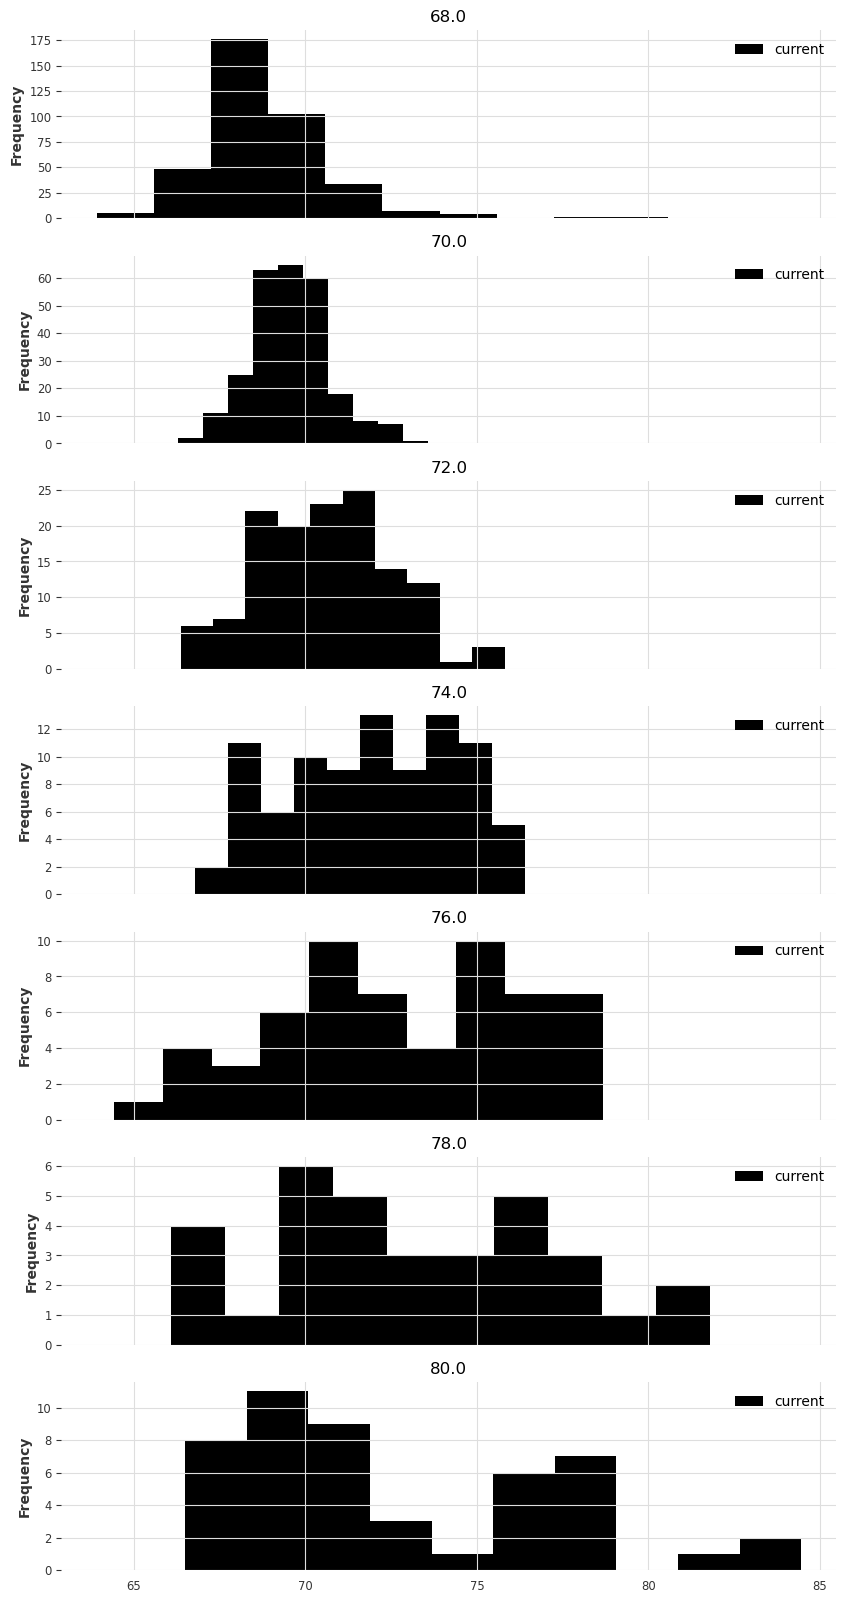

In [410]:
df_results[["pred", "current"]].plot.hist(by=["pred"], figsize = (10, 20), sharex=True);

In [69]:
from darts.ad import KMeansScorer, WassersteinScorer, CauchyNLLScorer
def get_anom(df):
    df = df.sort_index()
    S = 48 * 100
    N = int(len(df)/S)
    frames = [ df.iloc[i*S:(i+1)*S].copy() for i in range(N+1) ]
    frames.pop()
    all_frames = None
    frames = [df]
    for current_df in frames: 
        all_anom_score = None
        for index in range(30):
            ts_current_val = TimeSeries.from_dataframe(current_df["current"])
            ts_pred_val = TimeSeries.from_dataframe(current_df["pred"])
            ts_current_train = current_fcev.FCeV_model.input_series.drop_after(ts_current_val.start_time())
            ts_current_all = ts_current_train.append(ts_current_val)
            ts_base_all = ts_base_train.append(ts_base_val)
            scorer = KMeansScorer(k=3, window=10)
            scorer.fit(ts_current_train)
            anom_score = scorer.score_from_prediction(ts_current_val, ts_base_val)
            if all_anom_score is None:
                all_anom_score = anom_score
            else:
                all_anom_score = all_anom_score.concatenate(anom_score, axis = "component")
        if all_frames is None:
            all_frames = all_anom_score.mean(1)
        else:
            #print(f"end all {all_frames.end_time()} + start_new {all_anom_score.mean(1).start_time()}")
            all_frames = all_frames.append(all_anom_score.mean(1))
    return all_frames.pd_dataframe()

In [45]:
from FCeV import METRICS
metrics = {}
for key, value in all_dict.items():
    if isinstance(value, pd.DataFrame):
        df = value
        current = df["current"]
        pred = df["pred"]
        current_value = current_fcev.get_metrics_from_fc(current, pred, METRICS.RMSE).mean().mean()
        metrics[f"{key}"] = current_value
    else:
        for key_inner, value_inner in value.items():
            current = value_inner["current"]
            pred = value_inner["pred"]
            current_value = current_fcev.get_metrics_from_fc(current, pred, METRICS.RMSE).mean().mean()
            metrics[f"{synthetic_events.iloc[int(key_inner)].item()}"] = current_value


In [46]:
metrics

{'BASE': 14.710709,
 'EMPTY': 22.444054,
 '68.0': 19.770477,
 '70.0': 17.72344,
 '72.0': 20.344654,
 '74.0': 23.290714,
 '76.0': 25.694088,
 '78.0': 27.775642,
 '80.0': 29.59675}

In [47]:
pred_serie = None
for key, value in all_dict.items():
    if isinstance(value, pd.DataFrame):
        df = pd.DataFrame(current_fcev.get_metrics_from_fc(value, METRICS.RMSE).mean(axis = 1))
        df.columns = [f"{key}"]
        if pred_serie is None:
            pred_serie = TimeSeries.from_dataframe(df)
        else:
            pred_serie = pred_serie.concatenate(TimeSeries.from_dataframe(df), axis = "component")
    else:
        for key_inner, value_inner in value.items():
            df = pd.DataFrame(current_fcev.get_metrics_from_fc(value_inner, METRICS.RMSE).mean(axis = 1))
            df.columns = [f"{key}_{key_inner}"]
            pred_serie = pred_serie.concatenate(TimeSeries.from_dataframe(df), axis = "component")

TypeError: get_metrics_from_fc() missing 1 required positional argument: 'metrics'

In [48]:
anom_serie = None
for key, value in all_dict.items():
    if isinstance(value, pd.DataFrame):
        df = value
        df = get_anom(df)
        df.columns = [f"{key}"]
        if anom_serie is None:
            anom_serie = TimeSeries.from_dataframe(df)
        else:
            anom_serie = anom_serie.concatenate(TimeSeries.from_dataframe(df), axis = "component")
    else:
        for key_inner, value_inner in value.items():
            df = get_anom(value_inner)
            df.columns = [f"{key}_{key_inner}"]
            anom_serie = anom_serie.concatenate(TimeSeries.from_dataframe(df), axis = "component")

In [280]:
#val_events = current_fcev.FCeV_model.events.slice_intersect(anom_serie)["pr"]
#anom_serie = anom_serie.concatenate(val_events, axis= "component")

In [281]:
synthetic_events

,f107
0,68.0
1,70.0
2,72.0
3,74.0
4,76.0
5,78.0
6,80.0


In [49]:
next_slice = anom_serie
start_point = anom_serie.start_time()
chunks = list()
chunk_len = 48
total_len = len(anom_serie)
for index in range(total_len // chunk_len  - 1) :
    current_slice, next_slice = next_slice.split_before(chunk_len)
    start_point = current_slice.end_time()
    chunks.append(current_slice.pd_dataframe())

In [136]:
from fastcore import foundation


## USING TAB FASTAI

In [19]:
from fastai.tabular.all import *

In [107]:

y_name = "current"
df_tab = df_results.drop("pred",axis = 1).copy()
df_test = df_tab.iloc[:200]
df_tab = df_tab.iloc[200+1:]

min_y = np.min(df_tab[y_name]) - 1
df_tab[y_name] = np.log(df_tab[y_name] - min_y)

len_train = int(len(df_tab) * 0.8)
df_train = df_tab.iloc[:len_train];
df_val = df_tab.iloc[len_train + 1:];
len_train

639

In [108]:
splits = (L(range(len(df_train))), L(range(len(df_train) + 1, len(df_train) + len(df_val))))

In [126]:
to = TabularPandas(df_tab, procs=[FillMissing, Normalize],
                   cont_names = list(df_tab.drop(y_name, axis = 1).columns.values),
                   y_block=RegressionBlock(),
                   y_names=y_name,
                   splits=splits)
dls = to.dataloaders(bs=200)

SuggestedLRs(valley=0.0005754399462603033)

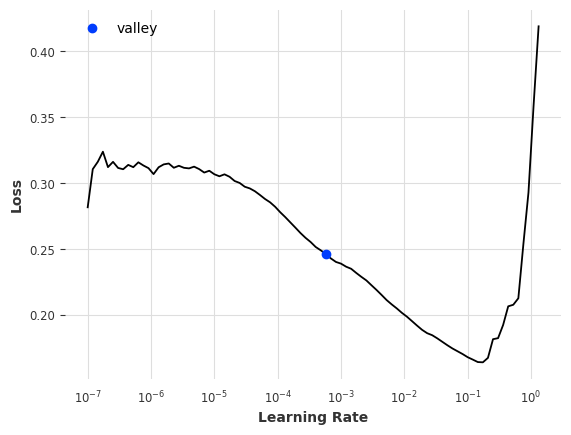

In [128]:
max_log_y = np.max(df_tab[y_name])*1.2
y_range = torch.tensor([0, max_log_y]); y_range
tc = tabular_config(ps=[0.2, 0.1], embed_p=0.4, y_range=y_range)
learn = tabular_learner(dls, layers=[10,50],
                        metrics=exp_rmspe,
                        config=tc,
                        loss_func=MSELossFlat())

tc = tabular_config(y_range=y_range)
learn = tabular_learner(dls,
                        metrics=exp_rmspe,
                        config=tc,
                        loss_func=MSELossFlat()
                        )
learn.lr_find()

In [130]:

learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,_exp_rmspe,time
0,0.058046,0.124310,0.280999,00:00
1,0.056037,0.123309,0.279833,00:00
2,0.056124,0.121898,0.278264,00:00
3,0.055270,0.120063,0.276211,00:00
4,0.055340,0.118686,0.274721,00:00
5,0.055456,0.118223,0.274059,00:00
6,0.055421,0.116766,0.272513,00:00
7,0.054967,0.118633,0.274189,00:00
8,0.055086,0.116300,0.271731,00:00
9,0.054891,0.116775,0.272486,00:00


In [131]:
dl = learn.dls.test_dl(df_test)
raw_test_preds = learn.get_preds(dl=dl)
learn.validate(dl=dl)
test_preds = (np.exp(raw_test_preds[0])+ min_y).numpy().T[0]
df_test["new_pred"] = test_preds
pd.options.plotting.backend = "plotly" 
from FCeV import METRICS
print(current_fcev.get_metrics_from_fc(df_test.head(200)["current"], df_test.head(200)["new_pred"], METRICS.RMSE).mean()/100)
df_test[["current", "new_pred"]].plot()

2.375274294102445


FigureWidgetResampler({
    'data': [{'hovertemplate': 'variable=current<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'current',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'current',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'uid': '839e8bdd-23a9-4925-a51d-5914cc63ca9d',
              'x': array([datetime.datetime(2017, 12, 31, 23, 30),
                          datetime.datetime(2018, 1, 1, 23, 30),
                          datetime.datetime(2018, 1, 2, 23, 30),
                          datetime.datetime(2018, 1, 3, 23, 30),
                          datetime.datetime(2018, 1, 4, 23, 30),
                          datetime.datetime(2018, 1, 5, 23, 30),
                          datetime.datetime(2018, 1, 6, 23, 30),
                          datetime.datetime(2018, 1,

## Using Pythorch Lightning

In [50]:
import pytorch_lightning as pl
import pandas as pd
import cv2
import os 
from torch import nn
from torch.utils.data import Dataset ,DataLoader
import numpy as np
import torch
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from torcheval.metrics import BinaryAccuracy
import torchmetrics
df_input =  anom_serie.pd_dataframe().drop("BASE", axis = 1)
#df_input =  pred_serie.pd_dataframe().drop("BASE", axis = 1)
df_label =  df_events.loc[df_input.index]
channels = len(df_input.columns)
CLASSES = 2
input_length = 48
kernel_size = 10
channel_1 = 64

In [67]:
class CassavaModel(pl.LightningModule):
    def __init__(self):
        
      #image_size = 64
        super().__init__()
        self.cnv = nn.Conv1d(channels,channel_1,kernel_size, padding='same')
        self.rel = nn.ReLU()
        self.bn = nn.BatchNorm1d(64)
        self.mxpool = nn.MaxPool1d(2)
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(input_length  * channel_1 // 2,32)
        self.fc2 = nn.Linear(32,32)
        self.fc3 = nn.Linear(32,1)
        self.softmax = nn.Softmax()
        self.accuracy = BinaryAccuracy()
        self.loss_fn = torch.nn.MSELoss()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.25)
        
    def forward(self,x):
        out = self.bn(self.rel(self.cnv(x)))
        out = self.flat(self.mxpool(out))
        out = self.dropout(self.rel(self.fc1(out)))
        out = self.dropout(self.rel(self.fc2(out)))
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

    
    def configure_optimizers(self):
        LR = 1e-3
        optimizer = torch.optim.AdamW(self.parameters(),lr=LR)
        return optimizer

    def training_step(self,batch,batch_idx):
        x,y = batch["x"],batch["y"]
        img = x.view(-1,channels,input_length)
        label = y.view(-1)
        out = self(img)
        
        loss = self.loss_fn(out,label)
        self.log('train_loss', loss)
        return loss       

    def validation_step(self,batch,batch_idx):
        x,y = batch["x"],batch["y"]
        img = x.view(-1,channels,input_length)
        label = y.view(-1)
        out = self(img)
        loss = self.loss_fn(out,label) 
        self.log('valid_loss', loss)
        return loss

    def predict_step(self, batch, batch_idx, dataloader_idx=0):
        x,y = batch["x"],batch["y"]
        img = x.view(-1,channels,input_length)
        label = y.view(-1)
        preds = self(img)
        preds = self.trainer.datamodule.min_max_scaler_y.inverse_transform(preds.cpu())
        current  = self.trainer.datamodule.min_max_scaler_y.inverse_transform(y.cpu())
        return current, preds
    
    def test_step(self,batch,batch_idx):
        x,y = batch["x"],batch["y"]
        img = x.view(-1,channels,input_length)
        label = y.view(-1)
        out = self(img)
        
        loss = self.loss_fn(out,label)
        self.log('test_loss', loss)
        return loss       

In [68]:
class CassavaDataset(Dataset):
    def __init__(self,df_data, df_events, input_length):
        self.df_data = df_data
        self.df_events = df_events
        self.input_length = input_length
    def __len__(self):
        return len(self.df_data) //  input_length
    
    def __getitem__(self,item):
        #index_selected = [item * input_length : ((item + 1) * input_length)]
        x = self.df_data[item * input_length : ((item + 1) * input_length)].to_numpy()
        y = self.df_events[item * input_length : ((item + 1) * input_length)].mean()

        return {
            "x":torch.tensor(x,dtype=torch.float),
            "y":torch.tensor(y,dtype=torch.float),
        } 

In [69]:
class CassavaLightDataset(pl.LightningDataModule):
    def __init__(self,df_input, df_label,input_length, test_part, batch_size=10):
        super().__init__()
        self.batch_size = batch_size
            
        self.min_max_scaler_y = preprocessing.MinMaxScaler()
        self.min_max_scaler_x = preprocessing.MinMaxScaler()
        self.df_input = df_input
        self.df_label = df_label
        self.test_part = test_part
        self.input_length = input_length

        
    def setup(self,stage=None):
        
        train_X,test_X, train_Y, test_Y  = train_test_split(self.df_input, self.df_label, test_size = self.test_part,shuffle = False)
        
        train_X_scaled = self.min_max_scaler_x.fit_transform(train_X.values)
        df_train_X_scaled = pd.DataFrame(train_X_scaled, columns = train_X.columns, index = train_X.index)
        
        test_X_scaled = self.min_max_scaler_x.transform(test_X.values)
        self.test_X = pd.DataFrame(test_X_scaled, columns = test_X.columns, index = test_X.index)
        
        ## LABEL TRAIN
        train_y_scaled = self.min_max_scaler_y.fit_transform(train_Y.values)
        df_train_y_scaled = pd.DataFrame(train_y_scaled, columns = train_Y.columns, index = train_Y.index)
        
        ## LABEL TEST
        test_y_scaled = self.min_max_scaler_y.transform(test_Y.values)
        self.test_Y = pd.DataFrame(test_y_scaled, columns = test_Y.columns, index = test_Y.index)
        
        self.train_X,self.val_X, self.train_Y, self.val_Y   = train_test_split(df_train_X_scaled,df_train_y_scaled, test_size = 0.1,shuffle = True)
        
        self.train_dataset = CassavaDataset(self.train_X, self.train_Y, self.input_length)
        self.validation_dataset = CassavaDataset(self.val_X, self.val_Y, self.input_length)
        self.predict_dataset = CassavaDataset(self.test_X, self.test_Y, self.input_length)
    def train_dataloader(self):
        train_loader = DataLoader(self.train_dataset,
                            batch_size=self.batch_size, drop_last=True,
                            
                            shuffle=True)
        return train_loader
    def val_dataloader(self):
        valid_loader = DataLoader(self.validation_dataset,
                            batch_size=self.batch_size,drop_last=True,
                            shuffle=False) 
        return valid_loader
        
    def test_dataloader(self):
        test_loader = DataLoader(self.predict_dataset,
                            batch_size=self.batch_size,drop_last=True,
                            shuffle=False) 
        return test_loader
    def predict_dataloader(self):
        predict_loader = DataLoader(self.predict_dataset,
                            batch_size=len(self.predict_dataset),
                            shuffle=False)    
        return predict_loader

In [70]:
df_label.plot()

FigureWidgetResampler({
    'data': [{'hovertemplate': 'variable=f107<br>ds=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'f107',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> f107 <i style="color:#fc9944">~1D</i>',
              'showlegend': True,
              'type': 'scattergl',
              'uid': 'd72ef181-5c56-4da3-a20e-dcd7032f4d47',
              'x': array([datetime.datetime(2017, 12, 31, 16, 30),
                          datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 1, 23, 30), ...,
                          datetime.datetime(2020, 9, 24, 23, 30),
                          datetime.datetime(2020, 9, 25, 23, 30),
                          datetime.datetime(2020, 9, 26, 11, 30)], dtype=object),
              'xaxis': 'x',
              'y': array([68.3, 66.8, 66.8

In [78]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='valid_loss',
    dirpath='./',
    filename='models-{epoch:02d}-{valid_loss:.2f}',
    save_top_k=3,
    mode='min') 

mod = CassavaModel()
dx = CassavaLightDataset(df_input, df_label,48, 0.1)
trainer = pl.Trainer(gpus=-1,max_epochs=10,callbacks=[checkpoint_callback])
trainer.fit(model=mod,datamodule=dx) 


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [79]:
trainer.test(dataloaders=dx.train_dataloader(), ckpt_path="best")

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.0007630812469869852   │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.0007630812469869852}]

In [80]:
# (1) load the best checkpoint automatically (lightning tracks this for you)

trainer.test(datamodule = dx, ckpt_path="best")

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.01590830273926258    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.01590830273926258}]

In [81]:
# test the model
predictions = trainer.predict(mod, dataloaders=dx.predict_dataloader(), ckpt_path="best")

Predicting: 80it [00:00, ?it/s]

In [82]:
pd.DataFrame([predictions[0][0].flatten(), predictions[0][1].flatten()]).T.plot()

FigureWidgetResampler({
    'data': [{'hovertemplate': 'variable=0<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '0',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'uid': '8421b065-c0e4-4ef7-a436-0a0984dacd29',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
                          54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
                          72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
                          90, 91, 92,

In [60]:
predictions

[(array([[70.64999969],
         [70.55000004],
         [69.95000021],
         [69.89999975],
         [69.60000015],
         [69.20000026],
         [70.15000015],
         [70.59999987],
         [70.59999987],
         [71.34999981],
         [71.25000016],
         [70.70000015],
         [70.79999981],
         [70.74999998],
         [70.94999993],
         [71.69999987],
         [71.80000016],
         [71.29999999],
         [70.39999992],
         [69.6999998 ],
         [70.19999998],
         [71.05000021],
         [71.05000021],
         [70.39999992],
         [70.15000015],
         [70.85000027],
         [70.9000001 ],
         [70.74999998],
         [71.10000004],
         [70.64999969],
         [70.55000004],
         [71.34999981],
         [71.84999999],
         [72.15000022],
         [72.35000016],
         [72.09999976],
         [72.15000022],
         [73.10000011],
         [73.65000011],
         [73.89999988],
         [74.49999971],
         [75.249

In [316]:
len(chunks)

47991

In [ ]:
current_series

In [ ]:
anom_serie.columns = ["NO"]

In [ ]:
from darts import TimeSeries
current_fcev = FCeV(FCev_config, darts_FCeV_config, df_signal, df_covariates,df_events,  output_path, df_synth)
    
iteration = 0
date_start = pd.Timestamp(2017, 1, 1)
current_fcev.create_folds(date_start, 12)
from func_timeout import func_set_timeout, FunctionTimedOut
@func_set_timeout(3600)
def train_with_timeout(fcev_instance, iteration):
    df_fore = current_fcev.process_fold(iteration)
    return df_fore
try:
    df_fore = train_with_timeout(current_fcev, iteration)
except FunctionTimedOut: 
    print(np.nan)

In [ ]:
df_fore["SYNTH_0"].keys()




In [ ]:
df_main = df_fore["BASE"]
df_synth_1 = df_fore["SYNTH_0"]["1"]
df_synth_3 = df_fore["SYNTH_0"]["3"]
df_synth_5 = df_fore["SYNTH_0"]["5"]
df_synth_6 = df_fore["SYNTH_0"]["6"]
df_synth_8 = df_fore["SYNTH_0"]["8"]
df_real = current_fcev.FCeV_model.input_series.pd_dataframe()

In [ ]:
import matplotlib.pyplot as plt
df_main = df_fore["BASE"]
df_synth_0 = df_fore["SYNTH_0"]["0"]
df_synth_1 = df_fore["SYNTH_0"]["1"]
df_synth_2 = df_fore["SYNTH_0"]["2"]
#ts_base_val.plot()
(get_anom(df_main)).plot(label="No event", c="orangered", lw=3)
#(get_anom(df_real)).plot(label="Real", c="red", lw=3)
(get_anom(df_synth_0)).plot(label="0 days after", c="blue", lw=3)
(get_anom(df_synth_1)).plot(label="1 days after", c="green", lw=3)
(get_anom(df_synth_2)).plot(label="2 days after", c="cyan", lw=3)

In [ ]:
TimeSeries.from_dataframe(main_df["pred"])

In [ ]:
from FCeV import METRICS
main_df = df_fore["BASE"]
#second_df = df_fore["SYNTH_0"]["5"]
print(current_fcev.get_metrics_from_fc(main_df, METRICS.RMSE).mean().mean())
print(current_fcev.get_metrics_from_fc(second_df, METRICS.RMSE).mean().mean())

In [33]:
main_df = df_fore["BASE"]

In [38]:
main_df.stack(level=1).reset_index(1).columns

Index(['component', 'current', 'pred', 'uncer'], dtype='object')

In [45]:
second_df= main_df.stack(level=1).reset_index(1)

In [46]:
second_df["uncer_min"] = second_df['pred'] - second_df['uncer']
second_df["uncer_max"] = second_df['pred'] + second_df['uncer']

second_df["uncer_min"] = second_df['pred'] 
second_df["uncer_max"] = second_df['pred']

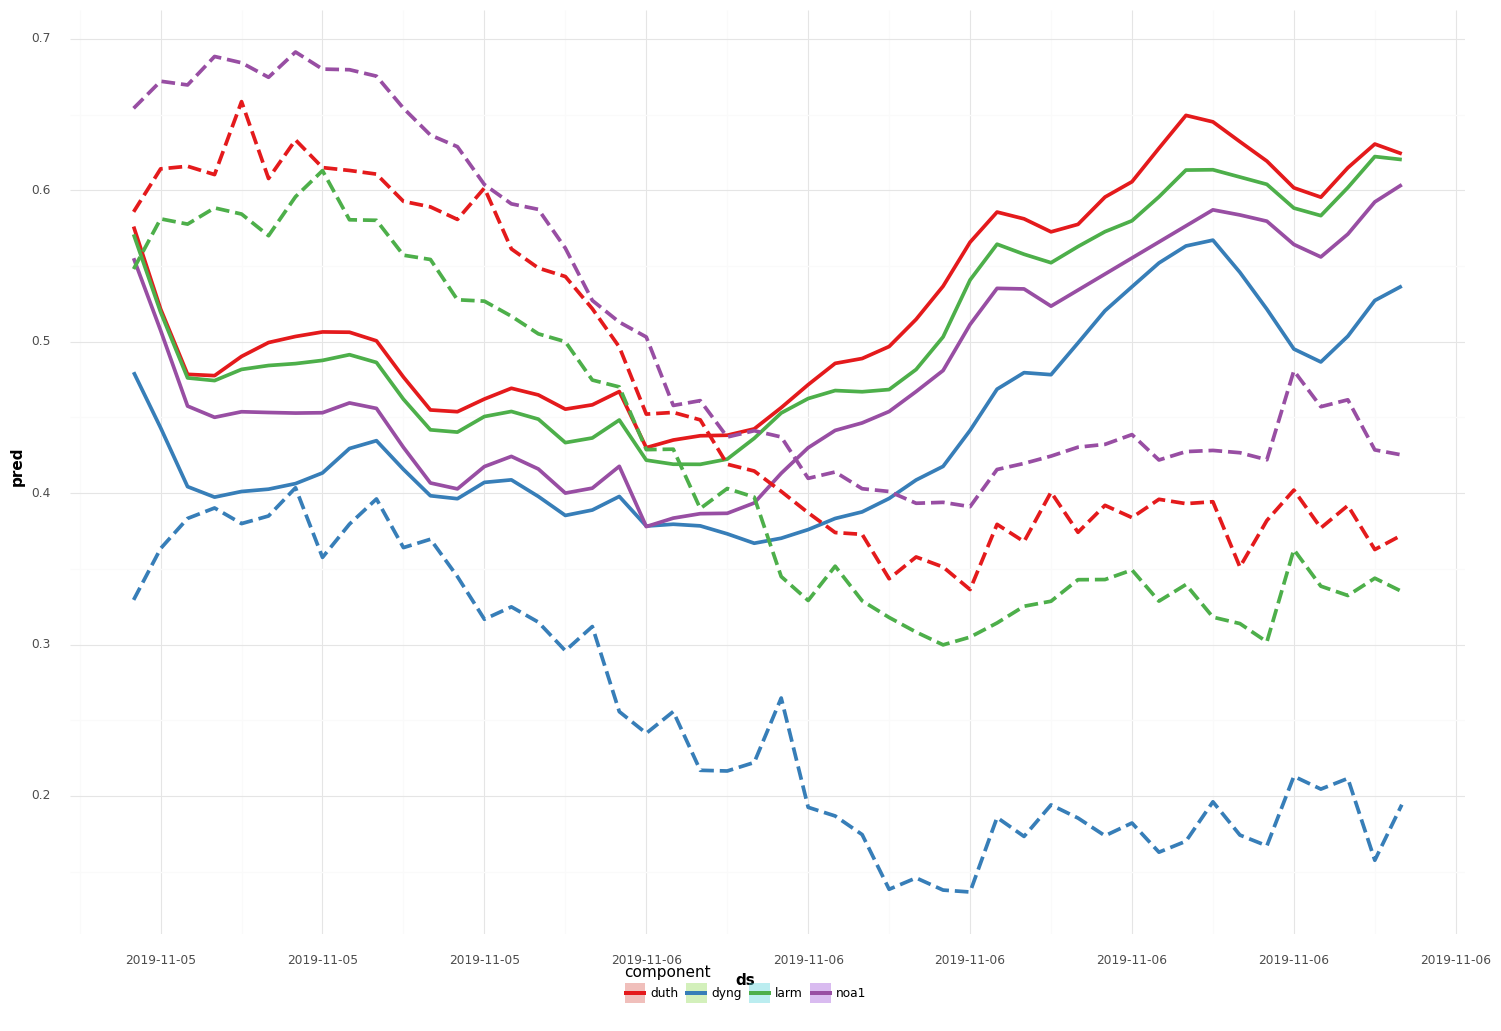

<ggplot: (8777135095336)>

In [47]:
from plotnine import ggplot, aes, facet_grid, labs, geom_line,geom_point, theme, geom_ribbon,theme_minimal,scale_color_brewer
from plotnine_prism import *
(
    ggplot(second_df.reset_index())  # What data to use
    + aes(x="ds")  # What variable to use
    + geom_ribbon(aes(y = "pred", ymin = "uncer_min", ymax = "uncer_max", fill = "component"), alpha = .4) 
    + geom_line(aes(y="current", color = "component"),size = 1.5)  # Geometric object to use for drawing
    + geom_line(aes(y="pred", color = "component"),linetype="dashed",size = 1.5 )  # Geometric object to use for drawing
    + theme_minimal() 
    +theme(legend_position="bottom", figure_size=(18, 12))
    + scale_color_brewer(type="qual", palette="Set1")
)

In [ ]:
from FCeV import METRICS
current_fcev.get_metrics_from_fc(df_fore["BASE"], METRICS.RMSE).mean().mean()

In [ ]:
current_fcev.get_metrics_from_fc(df_fore["SYNTH_2"]["8"], METRICS.RMSE).mean().mean()

In [ ]:
df_fore["BASE"].plot()

In [ ]:
df_fore["SYNTH_5"]["24"].plot()

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [ ]:
# before starting, we define some constants
num_samples = 200

figsize = (9, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [ ]:
train_day = dateutil.parser.parse("2018-09-30")
val_day = dateutil.parser.parse("2018-12-31")
series = TimeSeries.from_dataframe(df_ion[df_ion.index < val_day], fill_missing_dates=False, freq=freq)
series = series.astype(np.float32)
filler = MissingValuesFiller()
tec_series = filler.transform(series, method = "from_derivatives")

# Create training and validation sets:
train_tec, val_tec = tec_series.split_after(pd.Timestamp(train_day))

# We'll use the month as a covariate
scaler_tec = Scaler()
train_tec = scaler_tec.fit_transform(train_tec)
val_tec = scaler_tec.transform(val_tec)
tec_series = scaler_tec.transform(tec_series)



In [ ]:
widths = [4, 4, 3, 3, 6, 6, 6 ,6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 5, 7, 3, 4, 6, 4, 6, 5, 6, 6, 6, 9, 9, 9, 9, 3]
ion_data = pd.read_fwf('/home/carloscano/data/ion/ionosphere_parameters_data.txt', widths = widths, header=None)
id_ion = ["year", "doy", "hour", "id imf", "B scalar", "B vector", "Lat B", "Long B", "BY", "Bz", "SW Plasma Ta", "SW Proton", "SW Plasma Speed", "SW Plasma flow long", "SW Plasma Speed lat", "Alpha ratio", "Flow pressure", "Alfen", "Magneto", "Quasy", "Kp", "N sunspot", "Dst-index", "Ap index", "f107", "AE", "AL", "AU", "pc", "lyman", "Proton10", "Proton30", "Proton60", "Flux" ]
ion_data.columns = id_ion
strfmt = "{year}-{doy:0=3d}T{hour:0=2d}:00:00"

ion_data["datetime"] = ion_data.apply(lambda x: datetime.strptime(strfmt.format(year = int(x["year"]), doy = int(x["doy"]), hour = int(x["hour"])),"%Y-%jT%H:%M:%S"), axis = 1)

ion_data = ion_data.drop(["year", "doy", "hour"], axis = 1).set_index("datetime")

ion_data = ion_data[["Kp", "f107", "N sunspot"]]

In [ ]:
df_input

In [ ]:

ion_ts = TimeSeries.from_dataframe(ion_data[ion_data.index < val_day], fill_missing_dates=True, freq = "1H").resample(freq=freq)
ion_ts = ion_ts.astype(np.float32)
scaler_ion = Scaler()
ion_ts = scaler_ion.fit_transform(ion_ts)
# Create training and validation sets:
train_ion, val_ion = ion_ts.split_after(pd.Timestamp(train_day))

In [ ]:
my_model_TCN = TCNModel(
    input_chunk_length=48*5,
    output_chunk_length=48,
    n_epochs=40,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,    
    log_tensorboard=True,
     force_reset=True,
        pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },

)

my_model = RNNModel(
    model="RNN",
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=100,
    optimizer_kwargs={"lr": 1e-3},
    model_name="Ion_RNN",
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=14,
    force_reset=True,
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)

In [ ]:
%%time

my_model_TCN.fit(
    train_tec,
    past_covariates=ion_ts,
    verbose=True,
)

In [ ]:
my_model_TCN.predict(100, past_covariates=ion_ts).plot()

In [ ]:
my_model_TCN.predict(10)

In [ ]:
from darts.ad import KMeansScorer,ForecastingAnomalyModel
scorer = KMeansScorer(k=5, window=20)

In [ ]:
ad_model = ForecastingAnomalyModel(my_model_TCN, scorer)
scorer.fit(train_tec)

In [ ]:
#anom_score = ad_model.score(val_tec,    past_covariates=ion_ts)

In [ ]:
%%time
ad_model.show_anomalies(val_tec,    past_covariates=ion_ts)

In [ ]:
train_tec.plot()

In [ ]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train_tec))
binary_anom = detector.detect(anom_score)

In [ ]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [ ]:
# Scale so that the largest value is 1.
# This way of scaling perserves the sMAPE
scaler = Scaler(scaler=MaxAbsScaler())
train = scaler.fit_transform(train)
val = scaler.transform(val)
test = scaler.transform(test)

In [ ]:
for i in [10, 50, 100, 150, 250, 350]:
    plt.figure(figsize=(15, 5))
    all_series_fp32[i].plot(label="{}".format(i, lw=1))

In [ ]:
from darts.explainability.shap_explainer import ShapExplainer
from darts.models import RegressionModel

In [ ]:
model = RegressionModel(lags=24, lags_future_covariates = [24,24], output_chunk_length = 24)
model.fit(train_tec, future_covariates=ion_ts)

## DALEX

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [ ]:
# before starting, we define some constants
num_samples = 200

figsize = (25, 6)
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

In [ ]:
# Read data
series = AirPassengersDataset().load()

# we convert monthly number of passengers to average daily number of passengers per month
series = series / TimeSeries.from_series(series.time_index.days_in_month)
series = series.astype(np.float32)

# Create training and validation sets:
training_cutoff = pd.Timestamp("19571201")
train, val = series.split_after(training_cutoff)

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

# create year, month and integer index covariate series
covariates = datetime_attribute_timeseries(series, attribute="year", one_hot=False)
covariates = covariates.stack(
    datetime_attribute_timeseries(series, attribute="month", one_hot=False)
)
covariates = covariates.stack(
    TimeSeries.from_times_and_values(
        times=series.time_index,
        values=np.arange(len(series)),
        columns=["linear_increase"],
    )
)
covariates = covariates.astype(np.float32)

# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
scaler_covs = Scaler()
cov_train, cov_val = covariates.split_after(training_cutoff)
scaler_covs.fit(cov_train)
covariates_transformed = scaler_covs.transform(covariates)

In [ ]:
# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]
input_chunk_length = 48 * 5
forecast_horizon = 48
my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=1000,
    n_epochs=2,
    add_relative_index=False,
    add_encoders=None,
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  # QuantileRegression is set per default
    # loss_fn=MSELoss(),
    random_state=42,
            pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)


In [ ]:
my_model.fit(train_tec, future_covariates=ion_ts, verbose=True)

In [ ]:
def eval_model(model, n, actual_series, val_series):
    pred_series = model.predict(n=n, num_samples=num_samples)

    # plot actual series
    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    pred_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

    plt.title("MAPE: {:.2f}%".format(mape(val_series, pred_series)))
    plt.legend()


In [ ]:
eval_model(my_model, 48, tec_series, val_ion)

In [ ]:
forecast_horizon = 48
backtest_series = my_model.historical_forecasts(
    series_transformed,
    future_covariates=covariates_transformed,
    start=train.end_time() + train.freq,
    num_samples=num_samples,
    forecast_horizon=forecast_horizon,
    stride=forecast_horizon,
    last_points_only=False,
    retrain=False,
    verbose=True,
)

In [ ]:
def eval_backtest(backtest_series, actual_series, horizon, start, transformer):
    plt.figure(figsize=figsize)
    actual_series.plot(label="actual")
    backtest_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    backtest_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)
    plt.legend()
    plt.title(f"Backtest, starting {start}, {horizon}-months horizon")
    print(
        "MAPE: {:.2f}%".format(
            mape(
                transformer.inverse_transform(actual_series),
                transformer.inverse_transform(backtest_series),
            )
        )
    )

In [ ]:
eval_backtest(
    backtest_series=concatenate(backtest_series),
    actual_series=series_transformed,
    horizon=forecast_horizon * 10,
    start=training_cutoff,
    transformer=transformer,
)

In [ ]:
my_model = TCNModel(
    input_chunk_length=48*5,
    output_chunk_length=24,
    n_epochs=2,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,    
    log_tensorboard=True,
     force_reset=True,

)

In [ ]:
def retrain_func(pred_time, train_series, past_covariates, future_covariates):
    print(len(past_covariates))
    return True

In [ ]:
backtest = model_air.historical_forecasts(
    series=tec_filled,
    past_covariates=ion_ts,
    start=0.90,
    forecast_horizon=1,
    retrain=False,
    verbose=False,
    last_points_only = False,
)

In [ ]:
def plot_backtest(ts_actual, ts_backtest):
    ts_actual[ts_backtest.time_index].plot(label="actual")
    ts_backtest.plot(label="backtest (H=6)")
    plt.legend()


In [ ]:
plot_backtest(tec_filled, backtest[5])

In [ ]:
len(filled)*0.01

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel
from darts.metrics import mape
from darts.datasets import AirPassengersDataset

In [ ]:
# Read data:
series = AirPassengersDataset().load()
series = series.astype(np.float32)

# Create training and validation sets:
train, val = series.split_after(pd.Timestamp("19590101"))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [ ]:
my_model = RNNModel(
    model="RNN",
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=100,
    optimizer_kwargs={"lr": 1e-3},
    model_name="Air_RNN",
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=14,
    force_reset=True,
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)
my_model.fit(train_transformed, val_series=val_transformed)